In [1]:
import os
import json
import argparse
import math
from collections import namedtuple

import numpy as np
import cv2
from tqdm import tqdm
from skimage.io import imread
from shapely.geometry import Polygon
import tensorflow as tf

In [2]:
filename = 'D:/Learning/Satelite-object-detection/data/labels.json'

with open(filename) as f:
    data = json.load(f)
    
obj_coords = np.zeros((len(data['features']), 8))
image_ids = np.zeros((len(data['features'])), dtype='object')
class_indices = np.zeros((len(data['features'])), dtype=int)
class_names = np.zeros((len(data['features'])), dtype='object')

for idx in range(len(data['features'])):
    properties = data['features'][idx]['properties']
    image_ids[idx] = properties['image_id']
    obj_coords[idx] = np.array([float(num) for num in properties['bounds_imcoords'].split(",")])
    class_indices[idx] = properties['type_id']
    class_names[idx] = properties['type_name']

In [4]:
np.where(image_ids == '380.png')

(array([2560, 2561, 2562, 2563, 2564, 2565], dtype=int64),)

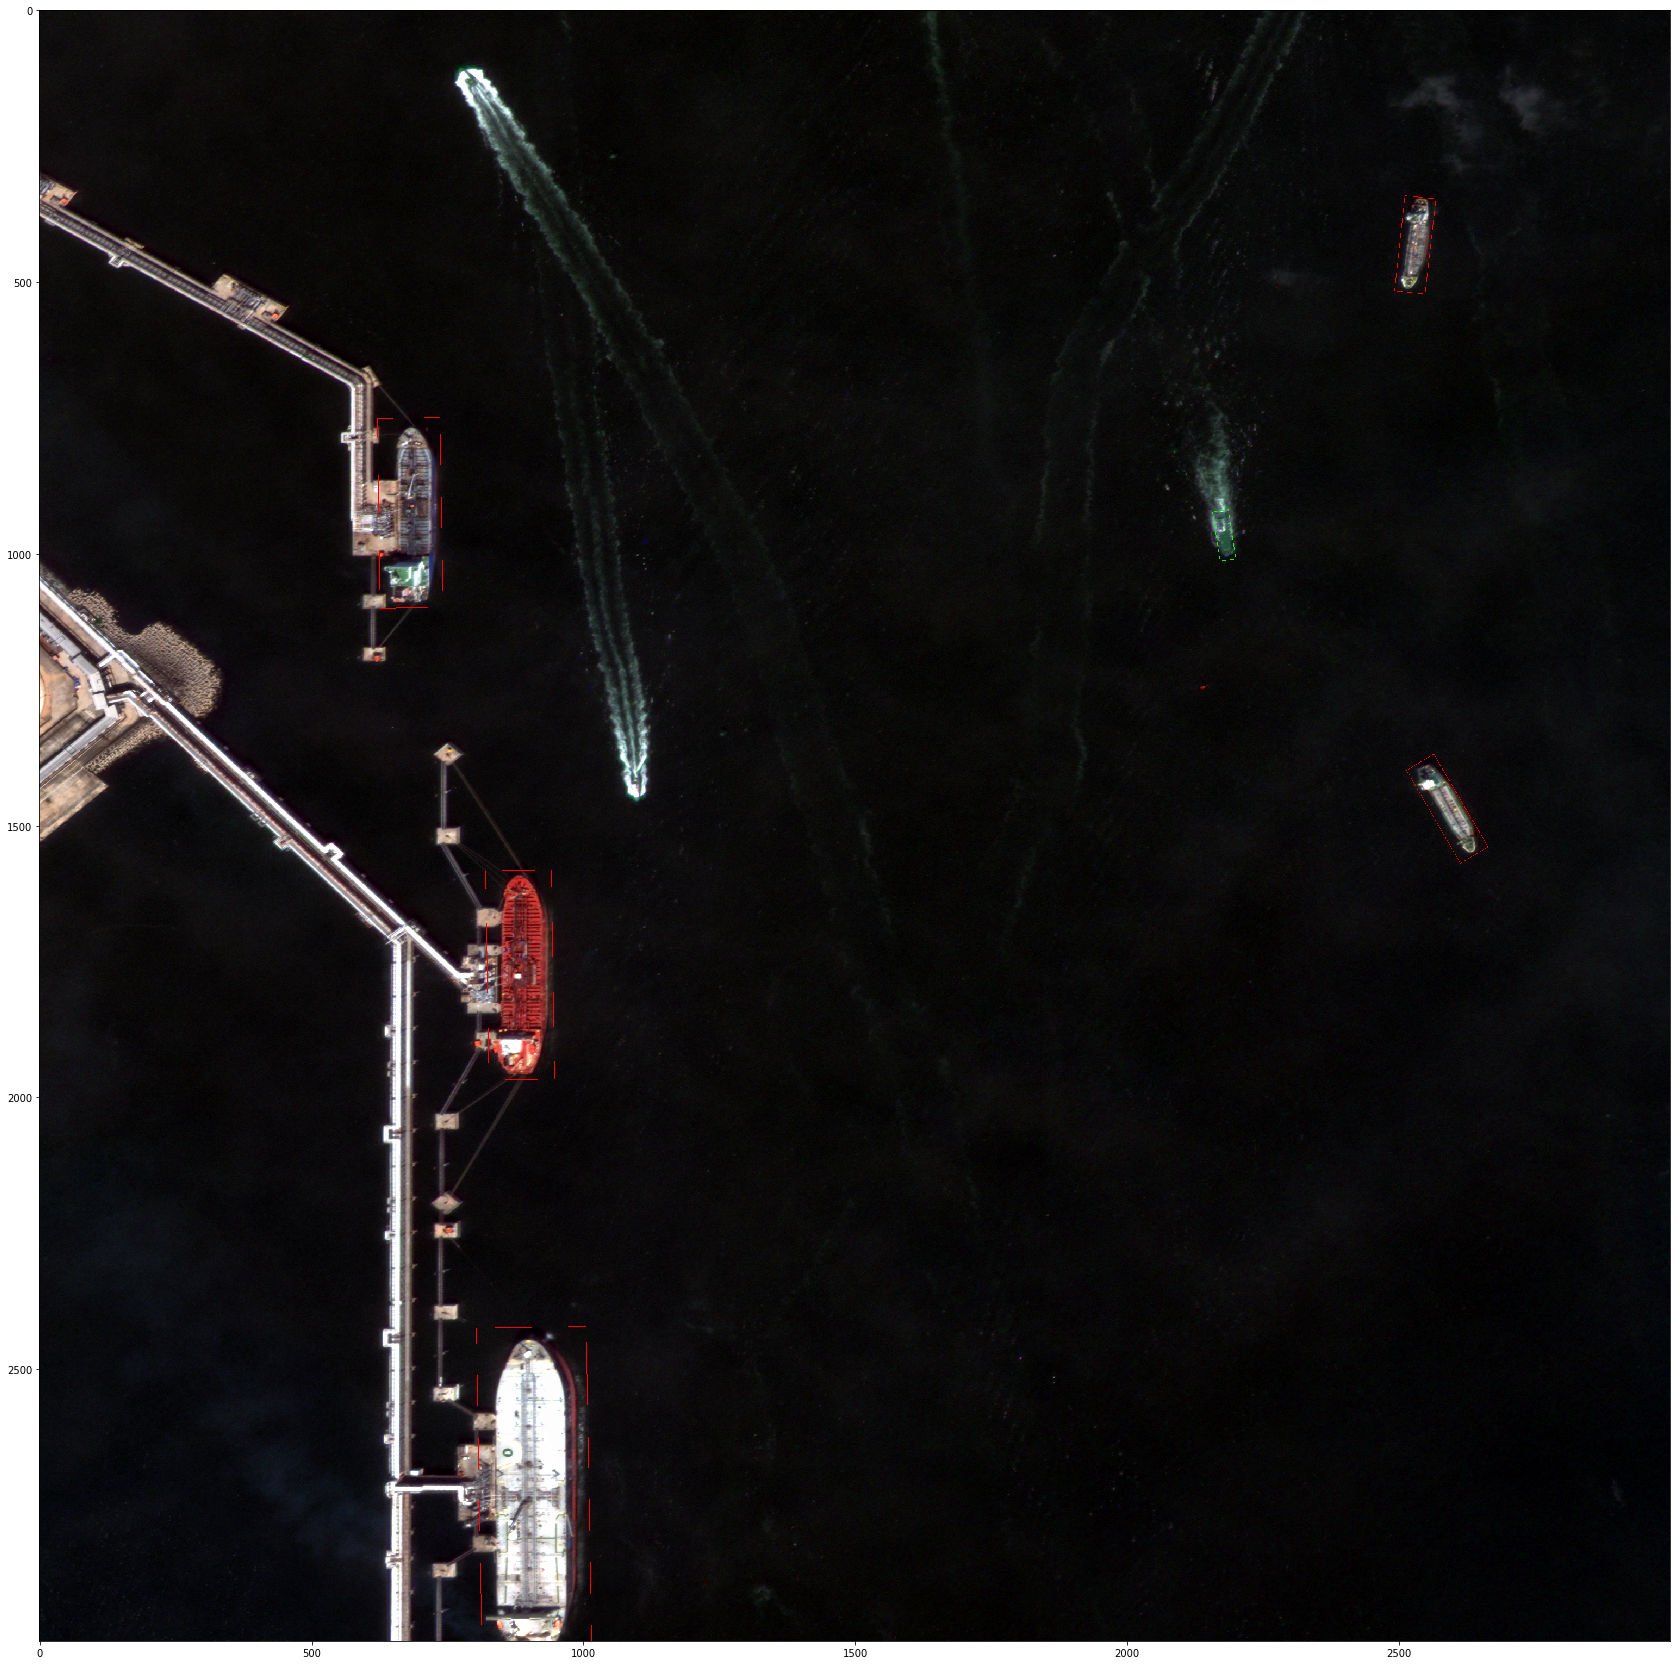

In [7]:
image_path = 'D:/Learning/Satelite-object-detection/data/train/380.png'
src_image = cv2.imread(image_path)

for i in range(2560, 2566):
    quadrangle = obj_coords[i]
    if class_indices[i] == 1:
        cv2.drawContours(src_image, [quadrangle.astype(np.int32).reshape((4, 2))], -1, (0, 0, 0), 1)
    elif class_indices[i] == 2:
        cv2.drawContours(src_image, [quadrangle.astype(np.int32).reshape((4, 2))], -1, (0, 0, 255), 1)
    else:
        cv2.drawContours(src_image, [quadrangle.astype(np.int32).reshape((4, 2))], -1, (0, 255, 0), 1)
        
src_image = src_image[:, :, ::-1]
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 30))
plt.imshow(src_image)

### CSV 파일 만들기

In [12]:
np.where(image_ids == '350.png')

(array([2344, 2345], dtype=int64),)

In [13]:
import pandas as pd
import numpy as np

df = pd.DataFrame(index = range(0, 2642), columns = ['image', 'x1','y1','x2','y2','x3','y3','x4','y4','class_name'])

In [15]:
for i in range(0, 2642) :
    df['image'][i] = 'D:/Learning/Satelite-object-detection/data/train/' + image_ids[i]
    df['x1'][i] = int(obj_coords[i][0])
    df['y1'][i] = int(obj_coords[i][1])
    df['x2'][i] = int(obj_coords[i][2])
    df['y2'][i] = int(obj_coords[i][3])
    df['x3'][i] = int(obj_coords[i][4])
    df['y3'][i] = int(obj_coords[i][5])
    df['x4'][i] = int(obj_coords[i][6])
    df['y4'][i] = int(obj_coords[i][7])
    df['class_name'][i] = class_names[i]

In [16]:
df_train = df[:2346]
df_val = df[2346:]

In [17]:
df_train.to_csv('D:/Learning/Satelite-object-detection/EfficientDet/train.csv', index=False,header = False)
df_val.to_csv('D:/Learning/Satelite-object-detection/EfficientDet/val.csv', index=False,header = False)

In [19]:
pd.read_csv('D:/Learning/Satelite-object-detection/EfficientDet/train.csv').tail(3)

D:/Learning/Satelite-object-detection/data/train/0.png  2236  2011  2238  \
2342  D:/Learning/Satelite-object-detection/data/tra...       105   279   120   
2343  D:/Learning/Satelite-object-detection/data/tra...      1419  2551  1441   
2344  D:/Learning/Satelite-object-detection/data/tra...      1281  2833  1348   

      1962  2481  1974  2479  2023  maritime vessels  
2342   297    52   353    37   335  maritime vessels  
2343  2562  1410  2628  1387  2617  maritime vessels  
2344  2849  1307  3022  1239  3006  maritime vessels

In [21]:
pd.read_csv('D:/Learning/Satelite-object-detection/EfficientDet/val.csv').tail(3)

D:/Learning/Satelite-object-detection/data/train/351.png  2207  1161  \
292  D:/Learning/Satelite-object-detection/data/tra...          75  1727   
293  D:/Learning/Satelite-object-detection/data/tra...         260  1887   
294  D:/Learning/Satelite-object-detection/data/tra...        2586  1894   

     2241  1115  2404  1239  2369  1284  maritime vessels  
292   117  1682   294  1850   252  1895         container  
293   307  1845   448  2004   401  2046         container  
294  2692  1789  2972  2070  2866  2175  maritime vessels

In [22]:
df_class = pd.DataFrame(index = ['container','oil tanker','aircraft carrier','maritime vessels' ], columns = ['class_indices'])
df_class['class_indices']['container'] = 1
df_class['class_indices']['oil tanker'] = 2
df_class['class_indices']['aircraft carrier'] = 3
df_class['class_indices']['maritime vessels'] = 4

In [23]:
df_class

class_indices
container                    1
oil tanker                   2
aircraft carrier             3
maritime vessels             4

In [24]:
df_class.to_csv('D:/Learning/Satelite-object-detection/EfficientDet/classes.csv', header = False)

In [25]:
pd.read_csv('D:/Learning/Satelite-object-detection/EfficientDet/classes.csv')

container  1
0        oil tanker  2
1  aircraft carrier  3
2  maritime vessels  4